# Machine Learning Project to Predict Stock Prices

*by Steven Cisneros*

## Introduction

In my final project the goal is to be able to predict the future prices of a fortune 500 company's stock. The company whoss future stock price I'm going to attempt to predict is Amazon.The dataset for the Amazon stock prices I will be using is a csv file downloaded from Yahoo's financial website that has a years worth of stock data. This stock data holds the Date, Open, Close, High, Low, Adjusted Close, and Volume of the Amazon stock. The two machine learning algorithms that I am going to implement and use in my final project are ReLU and Linear Regression. 

What I am planning to do when using the ReLU is to calculate the Adjusted Close price of the Amazon stock by using the input variables Open, Close, High, Low in the data set. By doing this I can then see how accurate it is to the actual data, to see if it matches it per day. This will allow me to predict the “past” stock prices. 

The Linear Regression algorithm will be used to predict the “future” stock prices for Amazon. To do this I am using the Adjusted Close price and from it create “future” price dates and then creating a confidence percentage to see how confident it is of the prices being.

In [1]:
import numpy as np # Matrices library
import random 

from copy import deepcopy
import matplotlib.pyplot as plt # Plotting/Graphing library
%matplotlib inline
import neuralnetworksA2 as nn # Neaural NetWork
import pandas as pd # Reading CSV
import mlutilities as ml
import qdalda
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression


/Users/steve-0/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# ReLU 
### For this section I will use the ReLU algo to use given data to predict Adj. Closing price on stock

In [2]:
def rmse(A, B):
    return np.sqrt(np.mean((A - B)**2))

def partition(X,T,rate,shuffle):
    
    sizeX = X.shape[0]
    rowIndices = np.arange(X.shape[0])
    if shuffle==True:
        np.random.shuffle(rowIndices)
        
    xPart = round(sizeX * rate)
    Xtrain = X[rowIndices[:xPart],:]
    Ttrain = T[rowIndices[:xPart],:]
    Xtest = X[rowIndices[xPart:],:]
    Ttest = T[rowIndices[xPart:],:]
    
    return Xtrain, Ttrain, Xtest, Ttest

In the function rmse, it takes the average of two numbers and makes the value positive. The reason why we do this is to calculate the errors over time and you can’t have a negative error amount between the predicted and actual values.


In the partition function the data will split to be able to prepare the data for training. Ttrain and Ttest is the same as T the input but it is partitioned. Ttrain is dependent on the learning rate. Depending on what the learning rate is, for example 80%, 80% of the data will be put into Ttrain and the remaining 20% will be put into Ttest. Same goes for Xtrain and Xtest before you train it.

In [3]:
data=pd.read_csv('AMZN1YR.csv')
data = data.drop(['Date'], axis=1)

In [4]:
print(data)

            Open         High          Low        Close    Adj Close    Volume
0     940.950012   949.049988   939.210022   949.039978   949.039978   3415700
1     952.799988   957.890015   950.200012   952.820007   952.820007   3262100
2     953.500000   953.750000   945.000000   948.950012   948.950012   2096500
3     945.109985   950.289978   940.780029   947.619995   947.619995   2194100
4     954.500000   962.789978   951.530029   961.349976   961.349976   3625900
5     958.729980   963.150024   956.059998   957.969971   957.969971   4270600
6     961.000000   970.059998   960.909973   966.070007   966.070007   3126100
7     954.700012   960.400024   944.119995   944.760010   944.760010   5145600
8     944.799988   962.750000   944.760010   958.489990   958.489990   3939300
9     962.840027   968.919983   959.719971   959.840027   959.840027   3972100
10    964.000000   971.380005   962.900024   970.669983   970.669983   2642200
11    975.020020   975.200012   966.849976   971.539

for T we want only the data in the Adjusted Close column because this is the actual data that we want to predict. for X we have all of the other columns (Open, Close, High, Low) except for Date and Volume so we drop them. The reason why we don’t want the Date is because its irrelevant for calculating because it has no direct correlation to the actual Adjusted Close price and the reason why we don’t need Volume because the Adjusted Close price is composed of the Opening price, Closing price, and its highest and lowest price of the day. 

In [5]:
T = data[['Adj Close']]
T = np.array(T)
X = data.drop(['Adj Close'], axis=1)
#T = data.drop(['Open','Close','High','Low','Adj Close'], axis=1)
X = np.array(X)

In [6]:
errors_good = []
hiddens = [[u]*nl for u in [1, 2, 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]

for hiddenlayer in hiddens:
    errorSumTrain = 0
    errorSumTest = 0
    for r in range(10):
        Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=False)
        nnet = nn.NeuralNetworkReLU(Xtrain.shape[1], hiddenlayer, Ttrain.shape[1])
        nnet.train(Xtrain, Ttrain, 100)
        errorSumTrain += rmse(Ttrain, nnet.use(Xtrain))
        errorSumTest += rmse(Ttest, nnet.use(Xtest))
    errors_good.append([hiddenlayer, (errorSumTrain/10), (errorSumTest/10)]) 

In [7]:
errors_best = []
hiddens2 = [[u]*nl for u in [ 5, 10, 50] for nl in [1, 2, 3, 4, 5, 10]]

for hiddenlayer in hiddens2:
    errorSumTrain = 0
    errorSumTest = 0
    for r in range(10):
        Xtrain, Ttrain, Xtest, Ttest = partition(X, T, 0.8, shuffle=False)
        nnet2 = nn.NeuralNetworkReLU(Xtrain.shape[1], hiddenlayer, Ttrain.shape[1])
        nnet2.train(Xtrain, Ttrain, 100)
        errorSumTrain += rmse(Ttrain, nnet2.use(Xtrain))
        errorSumTest += rmse(Ttest, nnet2.use(Xtest))
    errors_best.append([hiddenlayer, (errorSumTrain/10), (errorSumTest/10)]) 



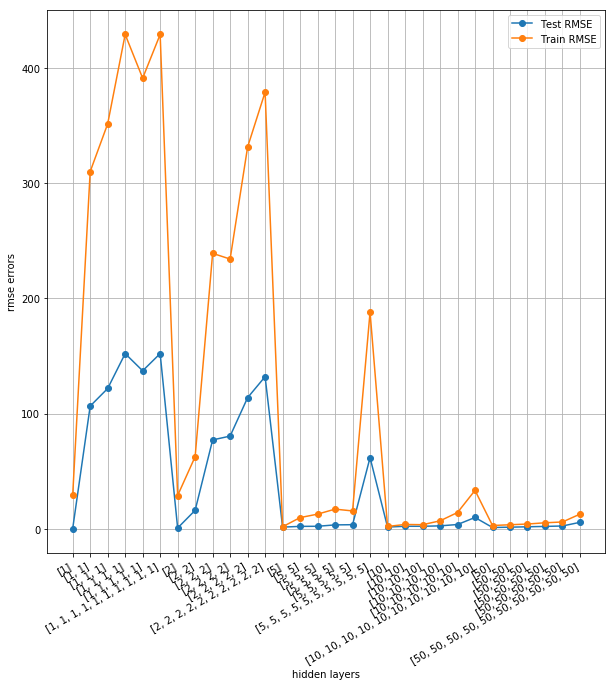

In [8]:
errors_good = pd.DataFrame(errors_good)  
plt.figure(figsize=(10, 10))
plt.plot(errors_good.values[:, 1:], 'o-')
plt.legend(('Test RMSE','Train RMSE',))
plt.xlabel('hidden layers')
plt.ylabel('rmse errors')
plt.xticks(range(errors_good.shape[0]), hiddens, rotation=30, horizontalalignment='right')
plt.grid(True)

The first graph produced above is created using the first set of hidden layers. The second graph is produced by using the second set of hidden layers. As you can see that the second set of hidden layers has less inaccuracy’s compared to the first one by removing values that keep it from getting smarter. The differences between the Test RMSE (blue line) and the Train RMSE (orange line) between the first graph is greater than the second graph meaning that it is less accurate. 


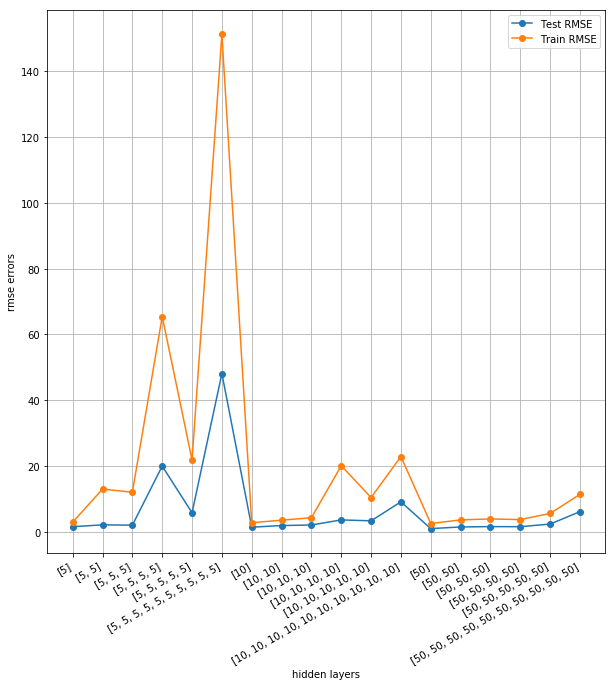

In [9]:
errors_best = pd.DataFrame(errors_best)  
plt.figure(figsize=(10, 10))
plt.plot(errors_best.values[:, 1:], 'o-')
plt.legend(('Test RMSE','Train RMSE',))
plt.xlabel('hidden layers')
plt.ylabel('rmse errors')
plt.xticks(range(errors_best.shape[0]), hiddens2, rotation=30, horizontalalignment='right')
plt.grid(True)

I started off with the amount of hidden layers that was given to us on the third assignment and it worked surprisingly well. From there I created another set of hidden layers in which I used the first set to find. From there I removed the less accurate layers/produced less accurate results. Which can also be seen printed below. T contains the actual Adjusted Close price of the stock and Y has the predicted Adjusted Close price of the first hidden layer set and first graph and Y2 has the predicted Adjusted Close price of the second more accurate hidden layer set and second graph. When you compare the values of T with Y and Y2 you can see Y2 is closer to the actual Adjusted Close price.

In [10]:
print(T)

[[  949.039978]
 [  952.820007]
 [  948.950012]
 [  947.619995]
 [  961.349976]
 [  957.969971]
 [  966.070007]
 [  944.76001 ]
 [  958.48999 ]
 [  959.840027]
 [  970.669983]
 [  971.539978]
 [  980.349976]
 [  993.380005]
 [  995.780029]
 [  996.700012]
 [  994.619995]
 [  995.950012]
 [ 1006.72998 ]
 [ 1011.340027]
 [ 1003.      ]
 [ 1010.070007]
 [ 1010.27002 ]
 [  978.309998]
 [  964.909973]
 [  980.789978]
 [  976.469971]
 [  964.169983]
 [  987.710022]
 [  995.169983]
 [  992.590027]
 [ 1002.22998 ]
 [ 1001.299988]
 [ 1003.73999 ]
 [  993.97998 ]
 [  976.780029]
 [  990.330017]
 [  975.929993]
 [  968.      ]
 [  953.659973]
 [  971.400024]
 [  965.140015]
 [  978.76001 ]
 [  996.469971]
 [  994.130005]
 [ 1006.51001 ]
 [ 1000.630005]
 [ 1001.809998]
 [ 1010.039978]
 [ 1024.449951]
 [ 1026.869995]
 [ 1028.699951]
 [ 1025.670044]
 [ 1038.949951]
 [ 1039.869995]
 [ 1052.800049]
 [ 1046.      ]
 [ 1020.039978]
 [  987.780029]
 [  996.190002]
 [  995.890015]
 [  986.919983]
 [  987.

In [11]:
Y = nnet.use(X,allOutputs=False)

In [12]:
print(Y)

[[  945.93408521]
 [  953.35761633]
 [  951.79263749]
 [  947.73631281]
 [  957.76372163]
 [  958.52734146]
 [  963.57860462]
 [  949.13679036]
 [  952.81651314]
 [  961.71175154]
 [  967.52815382]
 [  972.71724502]
 [  977.49469103]
 [  987.46096451]
 [  994.51233206]
 [  996.95484479]
 [  994.05845399]
 [  997.17973522]
 [ 1002.94225143]
 [ 1008.62660121]
 [ 1006.72528689]
 [ 1006.72341171]
 [ 1009.63871524]
 [  976.03149553]
 [  955.53152634]
 [  976.43680903]
 [  978.50069105]
 [  958.96709496]
 [  991.78756624]
 [  996.88907756]
 [  995.78832484]
 [  998.91207268]
 [ 1003.8324727 ]
 [ 1001.92787731]
 [  999.25376905]
 [  982.9223107 ]
 [  982.36687347]
 [  975.05351303]
 [  972.34905272]
 [  961.18919259]
 [  965.48986997]
 [  964.1509468 ]
 [  974.48560526]
 [  991.08656181]
 [  991.31319353]
 [ 1003.72567475]
 [ 1001.05631077]
 [ 1004.48385678]
 [ 1008.3194222 ]
 [ 1014.9834497 ]
 [ 1026.72543203]
 [ 1028.33153189]
 [ 1022.79142659]
 [ 1033.54847243]
 [ 1042.7893349 ]
 [ 1050.94

In [13]:
Y2 = nnet2.use(X,allOutputs=False)

In [14]:
print(Y2)

[[  944.99276078]
 [  952.74630868]
 [  949.5838707 ]
 [  946.01767234]
 [  957.54953632]
 [  957.43738142]
 [  964.57700889]
 [  949.23593393]
 [  953.78284837]
 [  961.44074094]
 [  967.63673862]
 [  971.56664407]
 [  977.32798015]
 [  990.16833736]
 [  994.36459445]
 [  996.94414747]
 [  993.7241407 ]
 [  996.0339064 ]
 [ 1002.94260885]
 [ 1009.43532116]
 [ 1007.09562561]
 [ 1007.36499682]
 [ 1010.30894986]
 [  987.34957309]
 [  964.60886285]
 [  977.00158106]
 [  979.55226446]
 [  958.53586372]
 [  990.16823175]
 [ 1002.91053097]
 [  995.76225308]
 [  999.30168406]
 [ 1002.56448259]
 [ 1001.92417966]
 [  999.65836603]
 [  984.39433544]
 [  983.61684057]
 [  976.43487276]
 [  973.33679931]
 [  961.64240447]
 [  966.73361826]
 [  965.69668766]
 [  975.23694537]
 [  992.2501928 ]
 [  991.87809535]
 [ 1003.6090689 ]
 [ 1001.3873242 ]
 [ 1002.23187409]
 [ 1008.52318381]
 [ 1018.08557556]
 [ 1027.39880955]
 [ 1030.24685125]
 [ 1023.16224741]
 [ 1035.64173366]
 [ 1036.75127712]
 [ 1040.15

# Linear Regression
### For this section I will use the Linear Regression algo to predict Adj. Closing price in future

In [15]:
def makeStandardize(X):
    means = X.mean(axis = 0)
    stds = X.std(axis = 0)
    
    def standardize(origX):
        return (origX - means)/stds
    
    return (standardize)

# Import data
data = pd.read_csv('AMZN1YR.csv')
dates = data[['Date']]


In [16]:
data = data[['Adj Close']]


To do Linear Regression what we first want to do is pull the data that is relevant to be able to predict the future Adjusted Closed price for the Amazon stock, so we store the Adjusted Close column in a variable named data. From there I create a variable named predictedDays in which will be the total number of days that the Linear Regression algorithm will predict the Adjusted Close price for each of those days. So what I do is create a column named Prediction and add it to data and shift.

In [17]:
#data.fillna(value=-55555, inplace=True)
predictedDays = int(7)

data['prediction'] = data[['Adj Close']].shift(-predictedDays)
copy_data = deepcopy(data)
data


,Adj Close,prediction
0,949.039978,944.760010
1,952.820007,958.489990
2,948.950012,959.840027
3,947.619995,970.669983
4,961.349976,971.539978
5,957.969971,980.349976
6,966.070007,993.380005
7,944.760010,995.780029
8,958.489990,996.700012
9,959.840027,994.619995


In [18]:
X_input = np.array(data.drop(['prediction'], 1))

What I do next is store just the Adjusted Close prices from the stocks into an numpy array and then standardize the data set.

In [19]:
means = X_input.mean(axis = 0)
stds = X_input.std(axis = 0)
standardized_X_input = (X_input - means)/stds

X_predictedDaysOut = standardized_X_input[-predictedDays:]
standardized_X_input = standardized_X_input[:-predictedDays]

Y_values = np.array(data['prediction'])
Y_values = Y_values[:-predictedDays]

Then what I do is initialize my variables X_train, X_test, Y_train, Y_test by splitting arrays into random train and test subsets. The nice thing with method train_test_split from the sklearn library is that it takes input data into just one call for splitting data in one line. Then after I have my variables initialized I use the LinearRegression method call to actually train it and fit it in the model. 

Confidence returns the coefficient of determination r^2 of the predicted future stock prices for the n number of days. The higher the percentage the more confident it is to being correct, the percentage can also be negative because it could reflect how bad of the prediction is.

Confidence Percentage:  0.941753732183


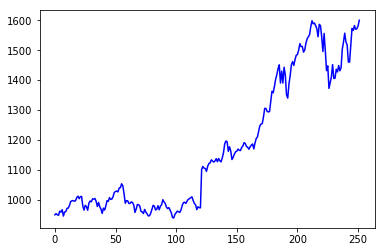

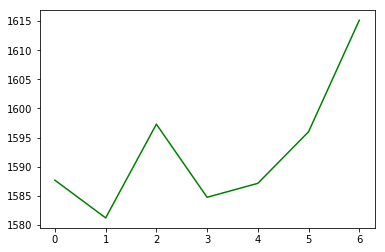

In [20]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(standardized_X_input, Y_values, test_size = 0.8)

# Training model LR 
LR = LinearRegression()
LR.fit(X_train,Y_train)

# Testing
confidence = LR.score(X_test, Y_test)
print("Confidence Percentage: ", confidence)
forecast_prediction = LR.predict(X_predictedDaysOut)


plt.plot(X_input, 'b')
#plt.axis([0,20,1400,1650])
#plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],dates)
plt.show()
plt.plot(forecast_prediction, 'g')
plt.show()

The first graph (blue line) is the representation of the Adjusted Close price of the Amazon stock starting from May 8, 2017 to May 7, 2018. The second graph (green line) is what the prices of the seven days after May 7, 2018 are predicted to be using Linear Regression. The Adjusted Close prices are listed below. One thing I did was experiment with the number of days to predict the Adjusted Close price, during experimenting I found out for about a years worth of data meaning 365 days you can only push it out about 7-10 days to keep it at or above a 90%. For my experiment I kept it at 7 days

In [21]:
print(forecast_prediction)

[ 1587.68708298  1581.21119864  1597.30614591  1584.75353179  1587.14821773
  1595.99893425  1615.14728963]


To see how accurate my final project was I waited until May 8th to see what the Adjusted Closed price was for the Amazon stock using googles finance tool. On May 7th the Adjusted Closed price was $1600.14 and for May 8th it was $1592.39. Where as my predicted Adjusted Closed price was $1587.68 for May 7th and $1581.21. So it was roughly off by at least $10. The reason why I chose the two algorithms I did was because to be able to predict the future you have to be able to predict the past, which is why I chose the two I did. 

## Methods

A majority of the resources I used were from class projects and class lectures. More specifically Assignments two and three. For the class lectures that were used were lecture nine and lecture three and lecture four.One of the resources I used in my project I got from a library named sklearn is used for data mining and data analysis. I use a couple of methods from this library like test train split, linear Regression, and predict. 

Say in detail what each team member did.

## Results

Show all results.  Intermediate resultw might be shown in above Methods section.  Plots, tables, whatever.

## Conclusions

There are many things that I thought were difficult doing this project. One thing is that it was hard to figure out which algorithms to use. For one when I started this project I had to change my algorithms from the two I had initially put on my project proposal. I also tried different algorithms but they ended up failing or not working the way that I thought. For example I attempted to use Logistic Regression but when doing the algorithm my predicted future Adjusted Close price where all the same even though I my mind I did the correct steps and the confidence was always zero, even when I tried different variations of the algorithm. I also tried using LDA because its another linear algorithm and I thought it would work perfectly, but I soon learned otherwise. The thing I was doing incorrectly with LDA is that it takes categories and attributes data to them, well the thing about Stock information is that there isn’t any real categories you can attribute your training to unlike if I were to do my project on lets say injuries or diseases. In which I can categorize my data. If I had to do any changes I think I would have liked to try to use different variations/modified versions of Linear Regression. I would try different libraries and neural networks and see which variation was more accurate to the predicted Adjusted Close price. Overall I had fun experience doing this project, in many ways it made me grow and test my own limits and knowledge to apply what I learned in Machine Learning and apply it to a real world problem to attempt to solve. Now if I can continue to modify and adjust my code, maybe I one day will come out with the perfect algorithm to do what many have tried to accomplish, predict stock prices.

### References

A majority of the resources I used were from class projects and class lectures. More specifically Assignments two and three. For the class lectures that were used were lecture nine and lecture three and lecture four.One of the resources I used in my project I got from a library named sklearn is used for data mining and data analysis. I use a couple of methods from this library like test train split, linear Regression, and predict. 